In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns 
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [16]:
import zipfile
import pandas as pd
# encodes the csv
dataset = pd.read_csv('GLOBAL TERRORISM.csv', encoding='ISO-8859-1', low_memory=False)
dataset

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
# Display the first few rows of the DataFrame
dataset.head()

In [4]:
dataset.shape

(181691, 135)

In [5]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
dataset.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
dataset['Casualities'] = dataset.Killed + dataset.Wounded
dataset=dataset[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]
dataset.head(10)

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,0.0,Cairo Police Headquarters,Black Nationalists,Police,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,Tupamaros (Uruguay),Police,Firearms
7,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,0.0,Edes Substation,Unknown,Utilities,Explosives
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...",New Year's Gang,Military,Incendiary
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,0.0,Selective Service Headquarters in Madison Wisc...,New Year's Gang,Government (General),Incendiary


In [7]:

dataset.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Casualities    16874
Target           636
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [8]:
dataset.dropna(axis=0, inplace=True)
dataset.shape
     

(159946, 16)

In [9]:
#Re-Checking for Missing Data:
dataset.isnull().sum()

Year           0
Month          0
Day            0
Country        0
Region         0
City           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Casualities    0
Target         0
Group          0
Target_type    0
Weapon_type    0
dtype: int64

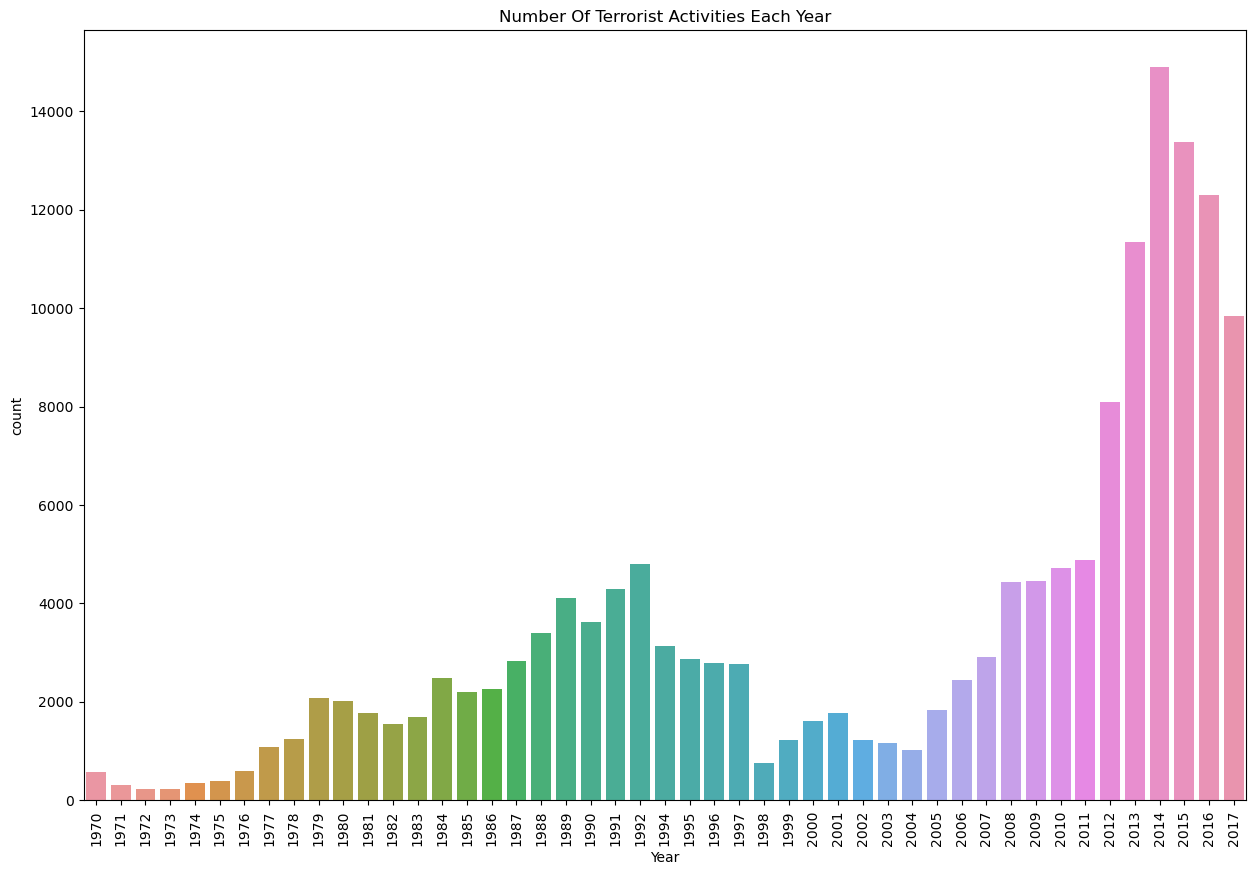

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Yearly Count of Terrorist Attack
plt.figure(figsize=(15,10))
sns.countplot(x="Year", data=dataset)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

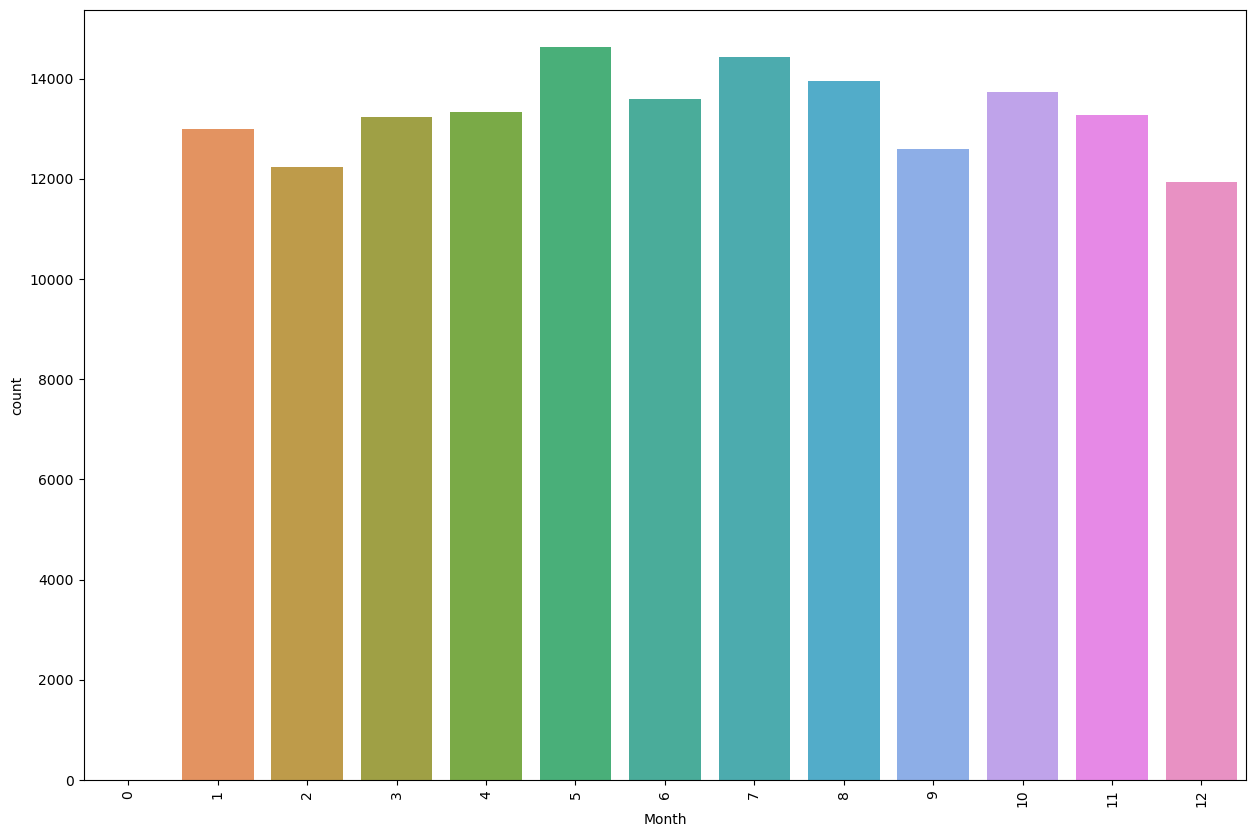

In [11]:
#month analysis
dataset['Month'].value_counts()
plt.figure(figsize = (15, 10))
sns.countplot(x='Month', data = dataset)
plt.xticks(rotation=90)
plt.show()

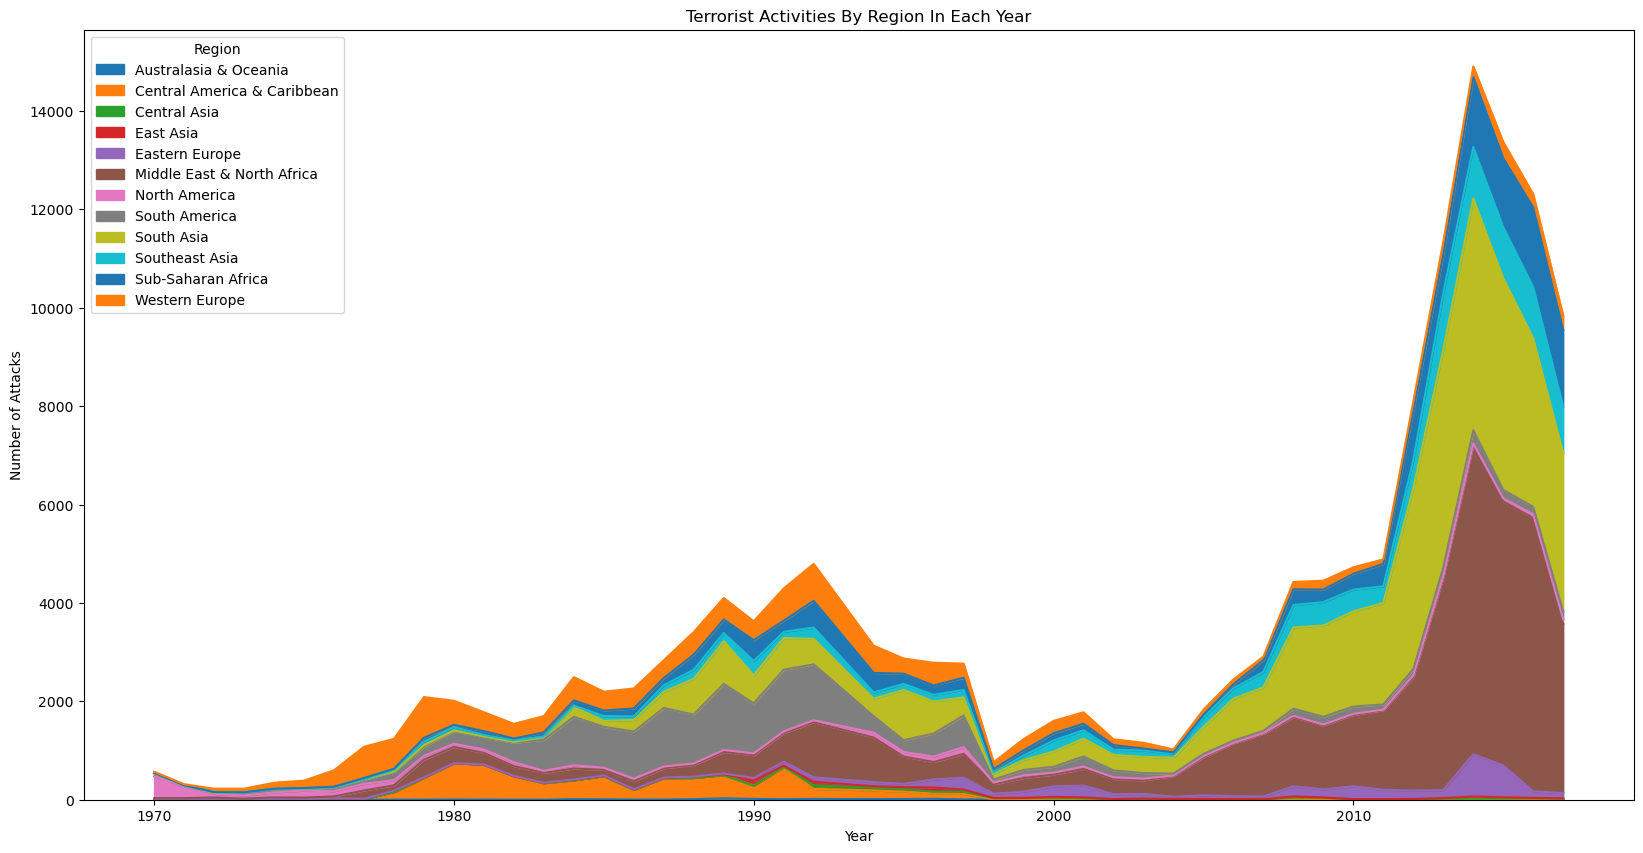

In [12]:
#Terrorist Activities By Region In Each Year
pd.crosstab(dataset.Year, dataset.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year')
plt.ylabel('Number of Attacks')
plt.show()
     

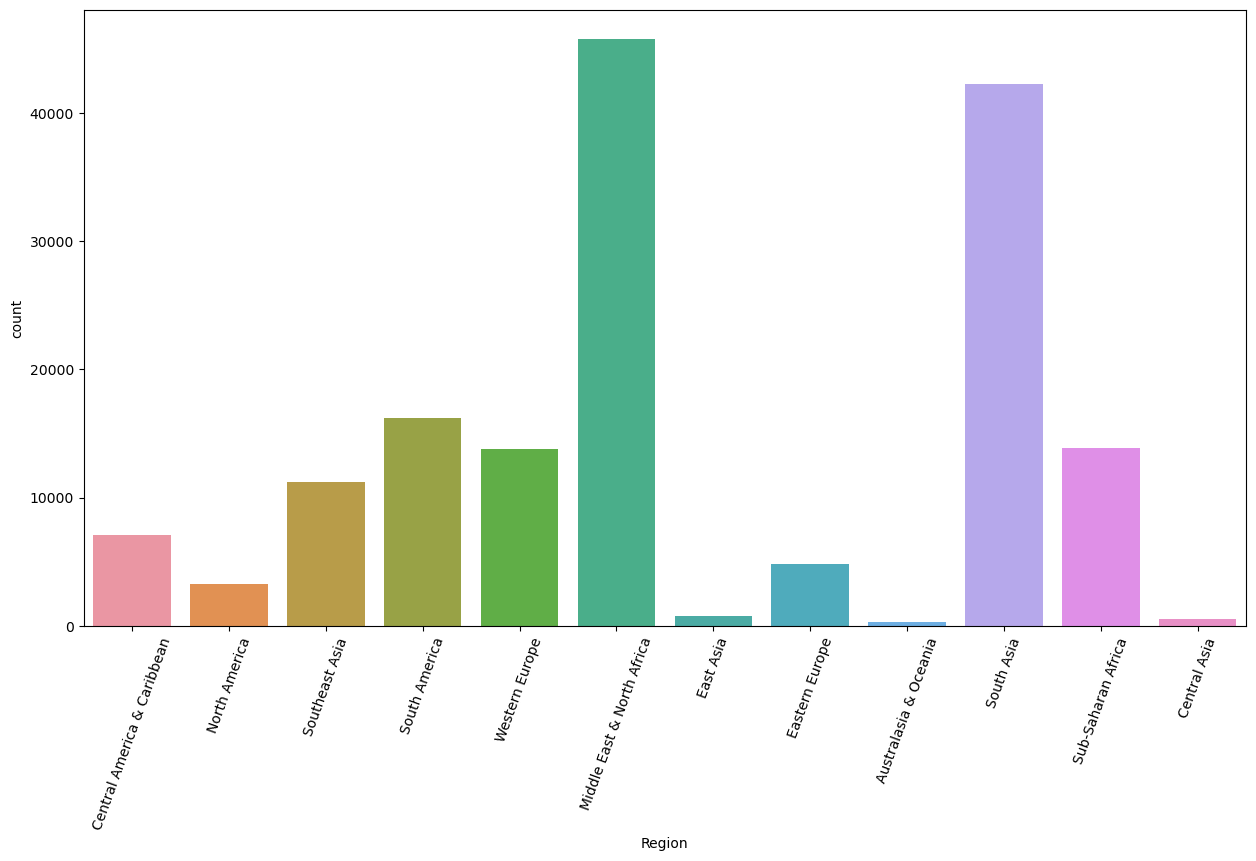

In [13]:
#REGION AFFECTED BY TERRORIST ATTACK
dataset['Region'].value_counts()
plt.figure(figsize=(15,8
                   ))
sns.countplot(x='Region',data=dataset)
plt.xticks(rotation=70)
plt.show()

In [2]:
#Counting the Yearly Casualities-
year_cas = dataset.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
px.bar(data_frame=year_cas,x = 'Year',y = 'Casualities',color='Casualities',template='plotly_dark')
     
    

NameError: name 'dataset' is not defined

In [18]:
AttackType=dataset.pivot_table(columns='AttackType',values='Casualities',aggfunc='sum')
AttackType = AttackType.T
AttackType['Type'] = AttackType.index

KeyError: 'Casualities'

In [ ]:
#plotting the Attack Type
labels = AttackType.columns.tolist()
attack=AttackType.T
values=attack.values.tolist()
values = sum(values,[])
attack_type = list(dataset['AttackType'].unique())
fig = go.Figure(data=[go.Pie(labels = attack_type,values=values,hole=.3)])
fig.update_layout(template = 'gridon')
fig.show()

In [19]:
from collections import Counter
values = list(dataset['AttackType'])
value_map = dict(Counter(values))
value_dataset = pd.DataFrame(value_map.items())
value_dataset.columns = ["AttackType","Count of Attack Type"]
px.bar(data_frame=value_dataset,x = 'AttackType',y = 'Count of Attack Type',color = 'AttackType',template="plotly_white")
     

KeyError: 'AttackType'

In [21]:
import folium
from folium.plugins import MarkerCluster
year=dataset[dataset['Year']==2014]
mapData=year.loc[:,'City':'longitude']
mapData=mapData.dropna().values.tolist()

map = folium.Map(location = [0, 50], tiles='CartoDB positron', zoom_start=2) 
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(mapData)):
    folium.Marker(location=[mapData[point][1],mapData[point][2]],
                  popup = mapData[point][0]).add_to(markerCluster)
map
pip install folium

SyntaxError: invalid syntax (2418204651.py, line 13)

In [20]:
pip install folium

     ------------------------------------ 102.3/102.3 kB 453.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
